# PRCP-1021-InsCostPred

# PROJECT TEAM ID : PTID-CDS-FEB-23-1459

# Problem Statement

### Task 1:- 
●  Prepare a complete data analysis report on the given data.

### Task 2:-
●	Prepare the data, identifying and extracting key features (both input and output parameters) relevant to the problem you will solve.
●	Build and train a machine learning model. Here you can evaluate different algorithms, settings and see which model is best for your scenario.
### Task 3:- 
Create a machine learning model to predict the insurance price charged to the customer. The charge depends on various features such as age, type of coverage, amount of coverage needed, gender, body mass index (BMI), region, and other special factors like smoking to determine what health risks the person possesses.


# BUSINESS CASE :

##### To predict the insurance charges based on given inputs.

# DOMAIN ANLAYSIS :

Insurance is a policy that helps to cover up all loss or decrease loss in terms of expenses incurred by various risks. A number of variables affect how much insurance costs. These considerations of different factors contribute to the insurance policy cost expression.

## age: 
age of primary beneficiary

## sex: 
insurance contractor gender, female, male

## bmi: 
 body mass index, providing an understanding of body, weights that are relatively high or low relative to height,           objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

## children: 
Number of children covered by health insurance / Number of dependents

## smoker: 
smoking or not Smoking

## region:
the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

## charges: 
individual medical costs billed by health insurance

# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
ins=pd.read_csv('datasets_13720_18513_insurance(1).csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
ins.shape

(1338, 7)

In [7]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
for i in ins.columns:
    print(f'no od unique values in {i} column is:',ins[i].unique().size)

no od unique values in age column is: 47
no od unique values in sex column is: 2
no od unique values in bmi column is: 548
no od unique values in children column is: 6
no od unique values in smoker column is: 2
no od unique values in region column is: 4
no od unique values in charges column is: 1337


In [10]:
ins.age.value_counts()

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

In [11]:
ins.describe(include="O")# this is used for catagrical data

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [12]:
ins.loc[ins.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
ins.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [14]:
# assigining in numerical and categorical
numerical=ins[['age','bmi','children','charges']]
categorical=ins[['sex','smoker','region']]
numerical.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [15]:
categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


# Exploratary Data Analysis:

### Univariante Analysis

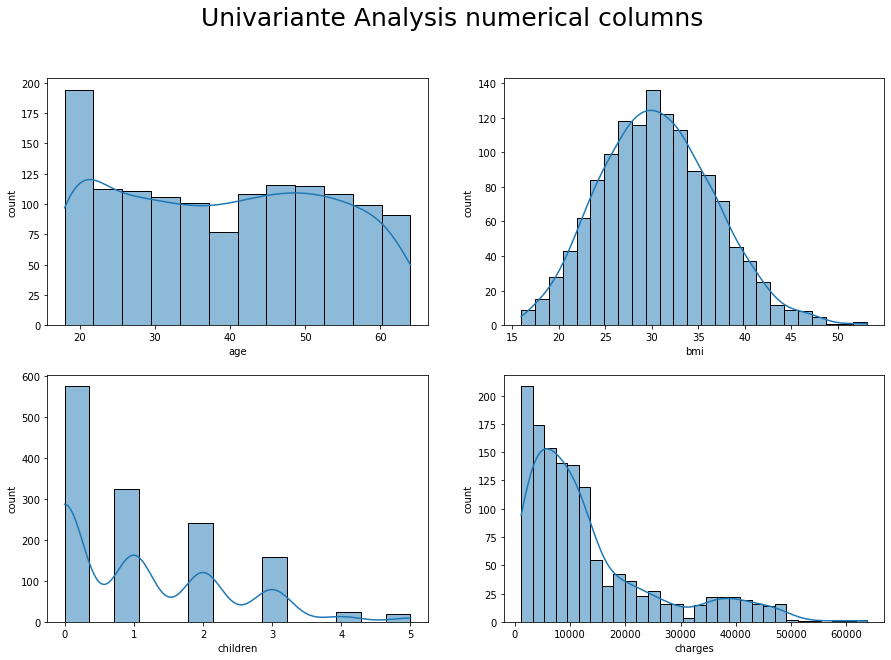

In [16]:
plt.figure(figsize=(15,10))
plotnumber=1
for i in numerical:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.histplot(numerical[i],kde=True)
        plt.xlabel(i)
        plt.ylabel('count')
        plotnumber+=1
plt.suptitle('Univariante Analysis numerical columns',fontsize=25)

plt.show()

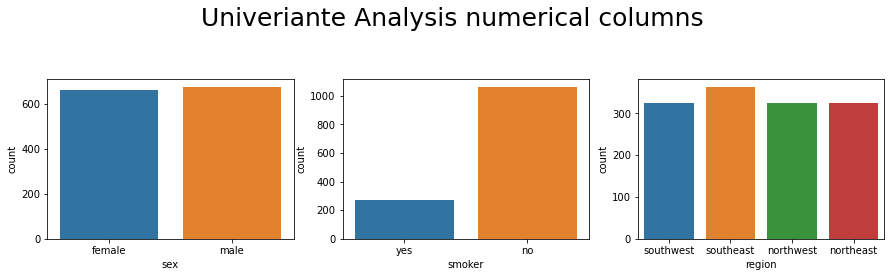

In [17]:
plt.figure(figsize=(15,10))
plotnumber=1
for i in categorical:
    if plotnumber<=3:
        plt.subplot(3,3,plotnumber)
        sns.countplot(categorical[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plotnumber+=1
plt.suptitle('Univeriante Analysis numerical columns',fontsize=25)
plt.show()

# insights from Univariate Analysis

# BIVARIATE ANALYSIS:

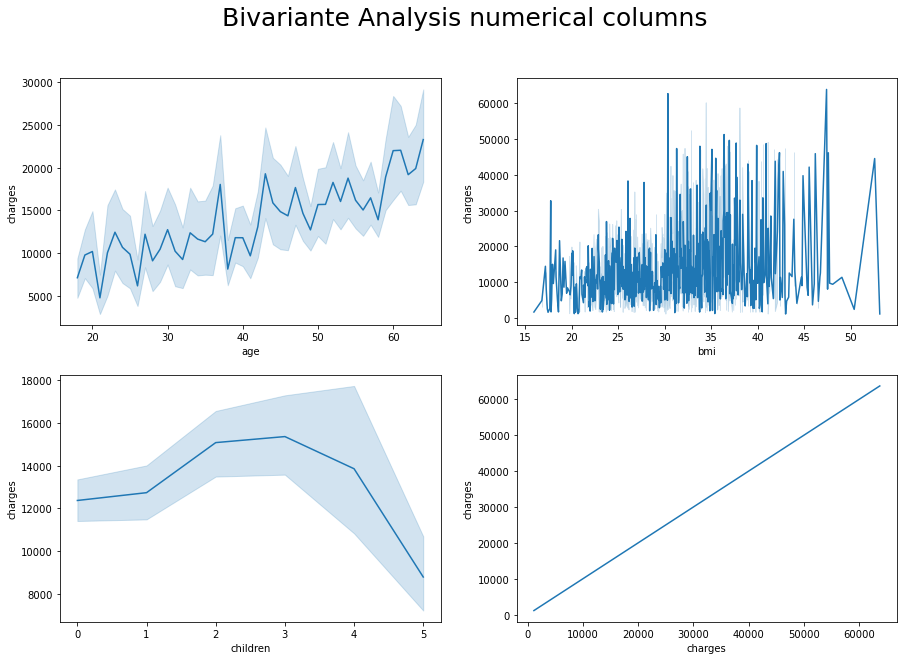

In [18]:
plt.figure(figsize=(15,10))
plotnumber=1
for i in numerical:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.lineplot(x=numerical[i],y=numerical["charges"])
        plotnumber+=1
plt.suptitle('Bivariante Analysis numerical columns',fontsize=25)
plt.show()

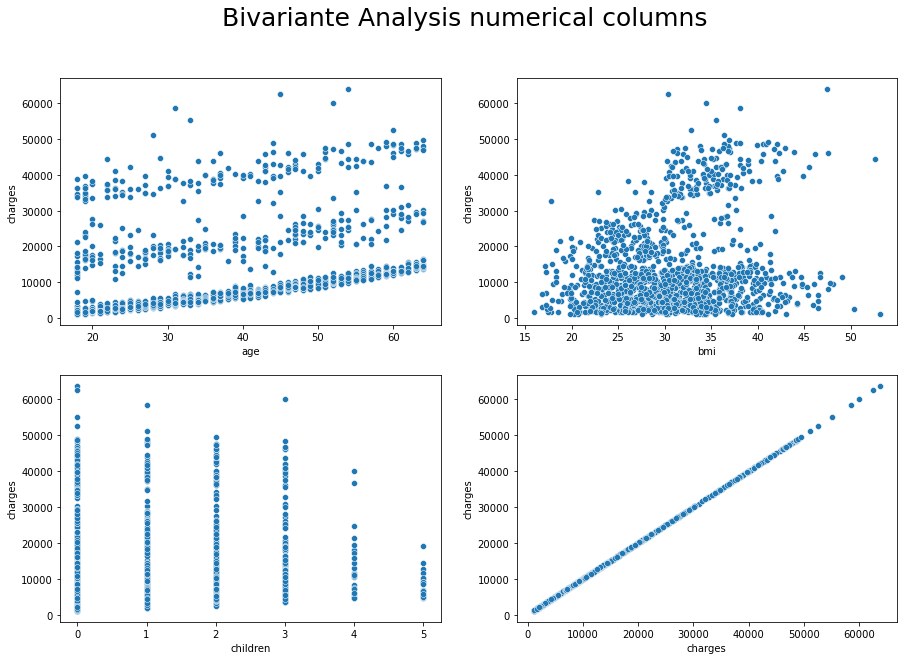

In [19]:
plt.figure(figsize=(15,10))
plotnumber=1
for i in numerical:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.scatterplot(x=numerical[i],y=numerical['charges'])
        plotnumber+=1
plt.suptitle('Bivariante Analysis numerical columns',fontsize=25)
plt.show()

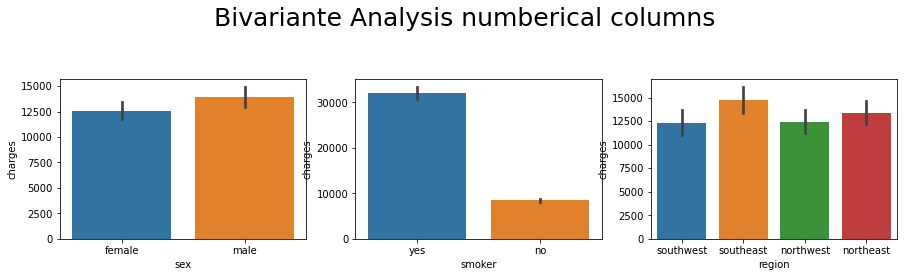

In [20]:
plt.figure(figsize=(15,10))
plotnumber=1
for i in categorical:
    if plotnumber<=3:
        plt.subplot(3,3,plotnumber)
        sns.barplot(x=categorical[i],y=ins['charges'])
        plotnumber+=1
plt.suptitle('Bivariante Analysis numberical columns',fontsize=25)
plt.show()

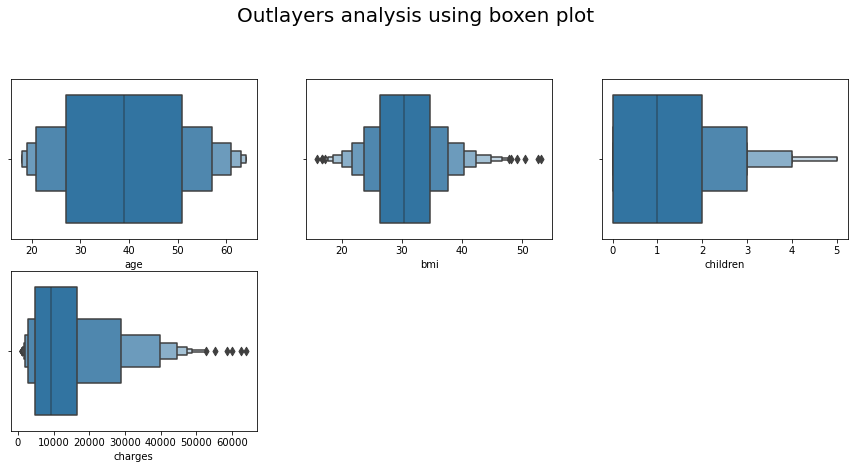

In [21]:
plt.figure(figsize=(15,10))
plotnumber=1
for i in numerical:
    if plotnumber<=4:
        plt.subplot(3,3,plotnumber)
        sns.boxenplot(x=numerical[i])
        plotnumber+=1
plt.suptitle('Outlayers analysis using boxen plot',fontsize=20)
plt.show()

<Figure size 1080x720 with 0 Axes>

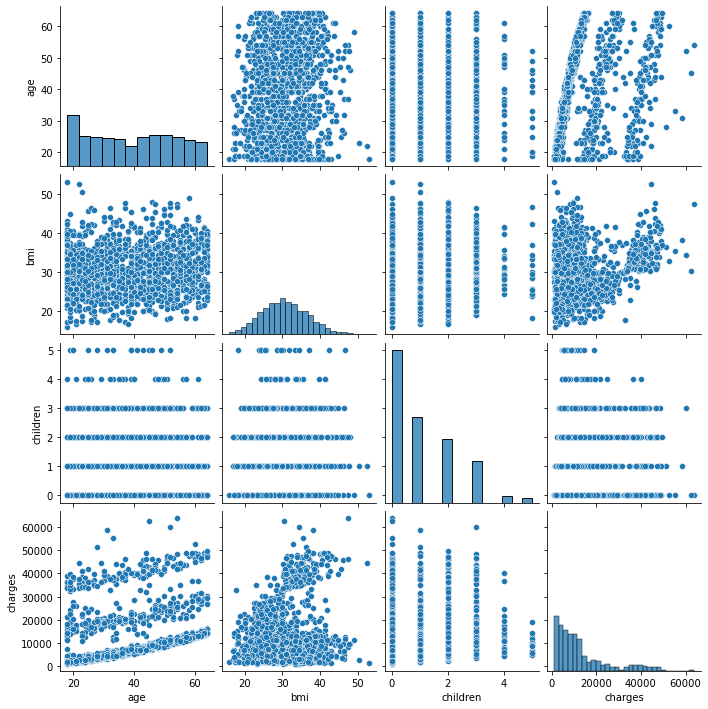

In [22]:
plt.figure(figsize=(15,10))
sns.pairplot(ins)
plt.show()

In [23]:
ins.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Insights from Bivariate Analysis :

In the Line-Plot , we can see that , with increase in age , there is an increase in charges.

BMI for ideal range has comparatively less charges when compared to BMI out of the ideal range.

For Smokers , the charges are high when compared to Non-Smokers.

For male , the charges are comparatively a bit high when compared with females.

For persons having children 2 and 3 , the premium charges are comparatively high.

SouthEast region have higer premium charges when compared with other regions.

For BMI , we found Outliers at the right side and they might fall under obese category. We have to verify it.

Charges distribution is skewed towards right.

# DATA PREPROCESSING & FEATURE ENGINEERING

In [24]:
# finding missing values
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
ins.loc[ins.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [26]:
ins.drop_duplicates(inplace=True)

In [27]:
ins.loc[ins.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges


In [28]:
# conversion of categorical data in to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ins.smoker=le.fit_transform(ins.smoker)

In [29]:
ins.sex=le.fit_transform(ins.sex)

In [30]:
ins.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [31]:
ins.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [32]:
ins.region=le.fit_transform(ins.region)

In [33]:
ins.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


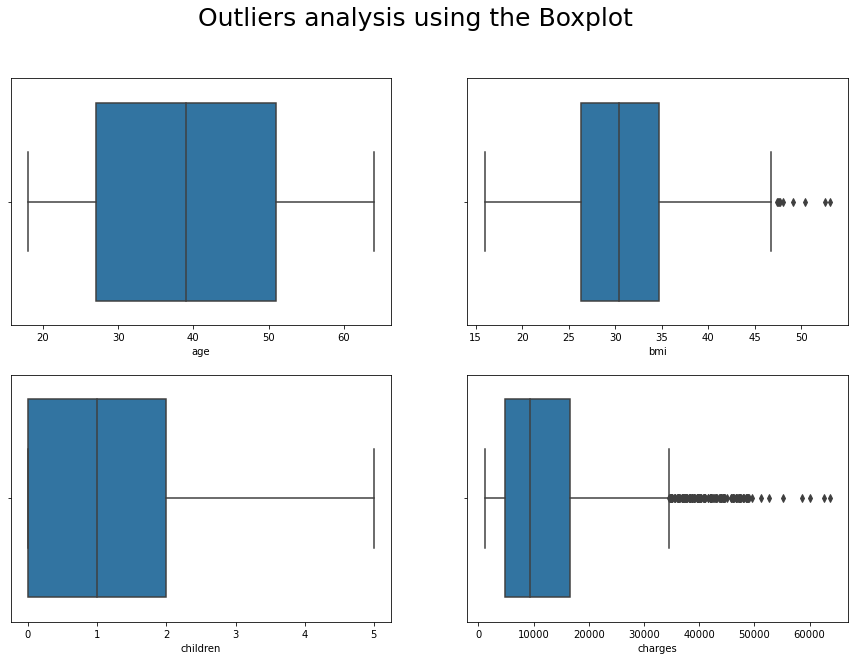

In [34]:
# checking and handeling the outliers
plt.figure(figsize=(15,10))
plotnumber=1
for i in numerical:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.boxplot(x=numerical[i])
        plotnumber+=1
plt.suptitle('Outliers analysis using the Boxplot',fontsize=25)
plt.show()

In [35]:
# we found outlayers in the BMI columns and we also found that the BMI is normall distributed
# here we use 3 sigma method to handel the out layers
lower_limit=ins.bmi.mean()-3*ins.bmi.std()
print(lower_limit)

12.362046528819


In [36]:
upper_limit=ins.bmi.mean()+3*ins.bmi.std()
print(upper_limit)

48.96485698651381


In [37]:
ins.loc[ins['bmi']<lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [38]:
ins.loc[ins['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.3254
847,23,1,50.38,1,0,2,2438.0552
1047,22,1,52.58,1,1,2,44501.3982
1317,18,1,53.13,0,0,2,1163.4627


In [39]:
ins.loc[ins['bmi']>upper_limit,'bmi']=np.mean(ins.bmi)

In [40]:
ins.loc[ins['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges


In [41]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


In [42]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [43]:
# scaling the continous variables:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scale=ins[['age','bmi']]

In [44]:
scale

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [45]:
scale_ins=mms.fit_transform(scale)

In [46]:
d1=pd.DataFrame(scale_ins,columns=('age','bmi'))

In [47]:
d1

,age,bmi
0,0.021739,0.371847
1,0.000000,0.554656
2,0.217391,0.530676
3,0.326087,0.210059
4,0.304348,0.402367
...,...,...
1332,0.695652,0.467456
1333,0.000000,0.497041
1334,0.000000,0.650576
1335,0.065217,0.306447


In [48]:
ins.reset_index(drop=True,inplace=True)

In [49]:
ins.drop(['age','bmi'],axis=1,inplace=True)

In [50]:
new_ins=pd.concat([d1,ins],axis=1)
new_ins

,age,bmi,sex,children,smoker,region,charges
0,0.021739,0.371847,0,0,1,3,16884.92400
1,0.000000,0.554656,1,1,0,2,1725.55230
2,0.217391,0.530676,1,3,0,2,4449.46200
3,0.326087,0.210059,1,0,0,1,21984.47061
4,0.304348,0.402367,1,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,0.695652,0.467456,1,3,0,1,10600.54830
1333,0.000000,0.497041,0,0,0,0,2205.98080
1334,0.000000,0.650576,0,0,0,2,1629.83350
1335,0.065217,0.306447,0,0,0,3,2007.94500


In [51]:
new_ins.isnull().sum()

age         0
bmi         0
sex         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
# applying transformation for normalizing target:
# log transformation:
new_ins.charges=np.log(new_ins['charges'])

In [53]:
new_ins

,age,bmi,sex,children,smoker,region,charges
0,0.021739,0.371847,0,0,1,3,9.734176
1,0.000000,0.554656,1,1,0,2,7.453302
2,0.217391,0.530676,1,3,0,2,8.400538
3,0.326087,0.210059,1,0,0,1,9.998092
4,0.304348,0.402367,1,0,0,1,8.260197
...,...,...,...,...,...,...,...
1332,0.695652,0.467456,1,3,0,1,9.268661
1333,0.000000,0.497041,0,0,0,0,7.698927
1334,0.000000,0.650576,0,0,0,2,7.396233
1335,0.065217,0.306447,0,0,0,3,7.604867


<AxesSubplot:xlabel='charges', ylabel='Density'>

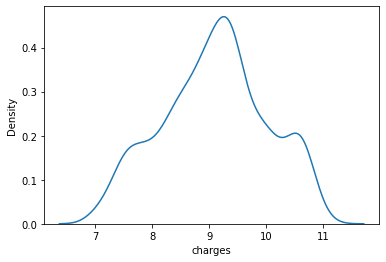

In [54]:
sns.kdeplot(new_ins.charges)

In [55]:
new_ins.charges.describe()

count    1337.000000
mean        9.099928
std         0.918699
min         7.022756
25%         8.465130
50%         9.146992
75%         9.720629
max        11.063045
Name: charges, dtype: float64

# FEATURE SELECTION:

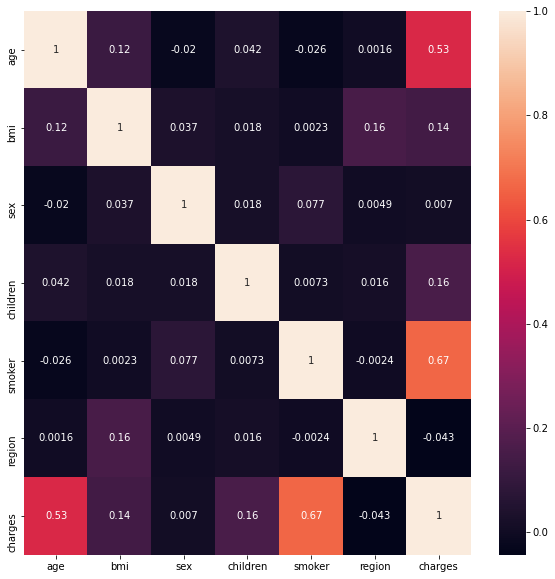

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(new_ins.corr(),annot=True)
plt.show()

In [57]:
new_ins.corrwith(new_ins.charges)

age         0.526927
bmi         0.139520
sex         0.007009
children    0.160336
smoker      0.665718
region     -0.043393
charges     1.000000
dtype: float64

In [58]:
(new_ins.corrwith(new_ins.charges)*100).sort_values(ascending=False)

charges     100.000000
smoker       66.571781
age          52.692716
children     16.033589
bmi          13.951962
sex           0.700942
region       -4.339291
dtype: float64

# MODEL CREATION

In [59]:
# independent and dependent variable creation
x=new_ins[['smoker','age','children','bmi']]
y=new_ins[['charges']]

In [60]:
x.head()

,smoker,age,children,bmi
0,1,0.021739,0,0.371847
1,0,0.000000,1,0.554656
2,0,0.217391,3,0.530676
3,0,0.326087,0,0.210059
4,0,0.304348,0,0.402367


In [61]:
# creatsing the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

# CREATION OF MODEL USING LINER REGRESSOR

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_pred

array([[ 9.04192641],
       [ 8.89532531],
       [10.31252879],
       [ 9.24678568],
       [ 8.02729191],
       [ 8.28111555],
       [ 8.22104683],
       [ 9.62580662],
       [ 9.55768822],
       [10.12925135],
       [ 9.13531828],
       [ 9.03538282],
       [ 8.81840121],
       [ 8.7925842 ],
       [10.86847503],
       [ 9.53469211],
       [ 8.80757794],
       [ 8.41396159],
       [ 8.63279311],
       [ 8.13074849],
       [ 9.87123925],
       [ 8.79490848],
       [ 9.5946431 ],
       [ 9.18025601],
       [ 9.76564638],
       [ 7.91866437],
       [ 9.4263594 ],
       [ 8.29924754],
       [ 9.54117594],
       [ 9.29203685],
       [ 8.48512972],
       [ 8.16887764],
       [10.68930603],
       [ 8.20308072],
       [ 8.03160085],
       [ 9.02558661],
       [ 9.23825186],
       [ 9.07963929],
       [ 8.78467231],
       [11.05864904],
       [ 8.06085595],
       [ 8.26645625],
       [10.39262144],
       [10.64363098],
       [ 7.98601626],
       [ 8

In [63]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mse=mean_squared_error
mae=mean_absolute_error
r2=r2_score

In [64]:
r2_score=r2(y_test,lr_pred)
r2_score

0.7459699358484524

In [65]:
x_test.shape

(402, 4)

In [66]:
adj_r2_score=1-(1-r2_score)*(402-1)/(402-4-1)
adj_r2_score

0.7434104389804268

In [67]:
import math
# testing set calculations:
print('TESTING SCORE:')
r2_score=('%.3f'%r2(y_test,lr_pred))
print('r2:',r2_score)
adj_r2_score=(round(adj_r2_score,3))
print('adj_r2_score:',adj_r2_score,'\n')
print('TESTING ERRORS: ')
MSE=('%.3f'%mse(y_test,lr_pred))
print('MSE:',MSE)
MAE=('%.3f'%mae(y_test,lr_pred))
print('MAE:',MAE)
RMSE=('%.3f'% math.sqrt(mse(y_test,lr_pred)))
print('RMSE:',RMSE)

TESTING SCORE:
r2: 0.746
adj_r2_score: 0.743 

TESTING ERRORS: 
MSE: 0.213
MAE: 0.290
RMSE: 0.461


In [68]:
# TRAINING DATA PREDICTION:
lr_pred_train=lr.predict(x_train)

In [69]:
r2_train=r2(y_train,lr_pred_train)
r2_train

0.7684542730434337

In [70]:
x_train.shape

(935, 4)

In [71]:
adj_r2_train=1-(1-r2_train)*(935-1)/(935-4-1)
adj_r2_train=(round(adj_r2_train,3))
adj_r2_train

0.767

In [72]:
# testing set calculations:
print('TRAINING SCORE:')
r2_train=('%.3f'%r2(y_train,lr_pred_train))
print('r2:',r2_train)
adj_r2_score_train=(round(adj_r2_train,3))
print('adj_r2_score:',adj_r2_score_train,'\n')
print('TRAINING ERRORS: ')
MSE_train=('%.3f'%mse(y_train,lr_pred_train))
print('MSE:',MSE_train)
MAE_train=('%.3f'%mae(y_train,lr_pred_train))
print('MAE:',MAE_train)
RMSE_train=('%.3f'% math.sqrt(mse(y_train,lr_pred_train)))
print('RMSE:',RMSE_train)

TRAINING SCORE:
r2: 0.768
adj_r2_score: 0.767 

TRAINING ERRORS: 
MSE: 0.196
MAE: 0.277
RMSE: 0.442


In [73]:
LinearRegression_SCORES={'TESTING SCORES':[r2_score,adj_r2_score,MSE,MAE,RMSE],
                        'TRAINING SCORE':[r2_train,adj_r2_score_train,MSE_train,MAE_train,RMSE_train]
                        }
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE']
lin_scores=pd.DataFrame(LinearRegression_SCORES,index=col)
lin_scores

,TESTING SCORES,TRAINING SCORE
R2Score,0.746,0.768
Adj_R2,0.743,0.767
MSE,0.213,0.196
MAE,0.290,0.277
RMSE,0.461,0.442


# 2)Creating aModel using SVM Regressor:

In [74]:
# support vector regressor model
from sklearn.svm import SVR
svregressor=SVR()
svregressor.fit(x_train,y_train)

SVR()

In [75]:
sv_pred=svregressor.predict(x_test)# predicting of test data
sv_pred

array([ 8.96584272,  8.83089497, 10.06322495,  9.27211542,  7.70681747,
        8.20492522,  8.22746191,  9.56229168,  9.83166575, 10.5903965 ,
        9.22315989,  9.05629331,  8.79357249,  8.73880656, 10.63775557,
        9.98990857,  8.87988271,  8.35655008,  8.69428743,  7.8356513 ,
        9.72492618,  8.83805371,  9.58916032,  9.1998235 , 10.3357425 ,
        7.5501705 ,  9.44463442,  8.1206278 , 10.1640174 ,  9.42646848,
        8.42039377,  7.77247049,  9.86468968,  8.02878527,  7.60265234,
        9.10387827,  9.20200589,  9.14482965,  8.8044065 , 10.81990021,
        7.65442326,  7.97737731, 10.07436682, 10.03346572,  7.54814424,
        8.47283023,  8.78968837, 10.20672085,  9.55238092,  8.66426837,
       10.55738002, 10.51694202, 10.08696391, 10.12422897,  9.35669869,
        7.60058883,  7.5185662 ,  9.43642399, 10.27545018,  9.43800044,
        8.80801435,  8.61750561, 10.51716432,  9.94813985,  7.54834172,
        8.26631351,  8.14528834, 10.39205046,  9.34162917,  9.06

In [76]:
# r2 score
sv_r2score=r2(y_test,sv_pred)
sv_r2score

0.8119236624743855

In [77]:
x_test.shape

(402, 4)

In [78]:
# adjusted r2 score
sv_adj_r2=1-(1-sv_r2score)*(402-1)/(402-4)
sv_adj_r2

0.8105060016387653

In [79]:
# testing set calculations:
print('TESTING SCORE:')
sv_r2_score_test=('%.3f'%r2(y_test,sv_pred))
print('r2:',sv_r2_score_test)
adj_r2_score_test=(round(sv_adj_r2,3))
print('adj_r2_score:',adj_r2_score_test,'\n')
print('TESTING ERRORS: ')
MSE_test=('%.3f'%mse(y_test,sv_pred))
print('MSE:',MSE_test)
MAE_test=('%.3f'%mae(y_test,sv_pred))
print('MAE:',MAE_test)
RMSE_test=('%.3f'% math.sqrt(mse(y_test,sv_pred)))
print('RMSE:',RMSE_test)

TESTING SCORE:
r2: 0.812
adj_r2_score: 0.811 

TESTING ERRORS: 
MSE: 0.158
MAE: 0.192
RMSE: 0.397


In [80]:
# prediction of training data:
sv_pred_train=svregressor.predict(x_train)

In [81]:
# r2 score
sv_r2_score_train=r2(y_train,sv_pred_train)
sv_r2_score_train

0.8318320505681902

In [82]:
x_train.shape

(935, 4)

In [83]:
sv_adj_score_train=1-(1-sv_r2_score_train)*(935-1)/(935-4-1)
sv_adj_score_train

0.8311087475598813

In [84]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_svr_train=('%.3f'% r2(y_train,sv_pred_train))
print('r2:',r2score_svr_train)
print('adj_r2 :',sv_adj_score_train,'\n')

print('Training Set Errors : ')

mse_svr_train=('%.3f'% mse(y_train,sv_pred_train))
print('MSE:',mse_svr_train)
rmse_svr_train=('%.3f'%  np.sqrt(mse(y_train,sv_pred_train)))
print('RMSE:',rmse_svr_train)
mae_svr_train=('%.3f'% mae(y_train,sv_pred_train))
print('MAE:',mae_svr_train)

Training Set scores : 
r2: 0.832
adj_r2 : 0.8311087475598813 

Training Set Errors : 
MSE: 0.142
RMSE: 0.377
MAE: 0.173


In [85]:
# checking cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svregressor,x,y,cv=5,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.8824689  0.72411736 0.89611178 0.82286381 0.79130581]
Cross validation Score: 0.8233735330663727
Std : 0.06271124389396546


# Hyperparameter tuning for SVM Regressor

In [86]:
# defining parameter range
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
              } 

grid = GridSearchCV(SVR(), param_grid, verbose =10,scoring='r2',cv=5)
  

In [87]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.1, gamma=1.............................................
[CV 1/5; 1/25] END ..............C=0.1, gamma=1;, score=0.736 total time=   0.0s
[CV 2/5; 1/25] START C=0.1, gamma=1.............................................
[CV 2/5; 1/25] END ..............C=0.1, gamma=1;, score=0.846 total time=   0.0s
[CV 3/5; 1/25] START C=0.1, gamma=1.............................................
[CV 3/5; 1/25] END ..............C=0.1, gamma=1;, score=0.868 total time=   0.0s
[CV 4/5; 1/25] START C=0.1, gamma=1.............................................
[CV 4/5; 1/25] END ..............C=0.1, gamma=1;, score=0.737 total time=   0.0s
[CV 5/5; 1/25] START C=0.1, gamma=1.............................................
[CV 5/5; 1/25] END ..............C=0.1, gamma=1;, score=0.876 total time=   0.0s
[CV 1/5; 2/25] START C=0.1, gamma=0.1...........................................
[CV 1/5; 2/25] END ............C=0.1, gamma=0.1

[CV 3/5; 11/25] END ..............C=10, gamma=1;, score=0.876 total time=   0.0s
[CV 4/5; 11/25] START C=10, gamma=1.............................................
[CV 4/5; 11/25] END ..............C=10, gamma=1;, score=0.740 total time=   0.0s
[CV 5/5; 11/25] START C=10, gamma=1.............................................
[CV 5/5; 11/25] END ..............C=10, gamma=1;, score=0.904 total time=   0.0s
[CV 1/5; 12/25] START C=10, gamma=0.1...........................................
[CV 1/5; 12/25] END ............C=10, gamma=0.1;, score=0.741 total time=   0.0s
[CV 2/5; 12/25] START C=10, gamma=0.1...........................................
[CV 2/5; 12/25] END ............C=10, gamma=0.1;, score=0.866 total time=   0.0s
[CV 3/5; 12/25] START C=10, gamma=0.1...........................................
[CV 3/5; 12/25] END ............C=10, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5; 12/25] START C=10, gamma=0.1...........................................
[CV 4/5; 12/25] END ........

[CV 4/5; 21/25] END ............C=1000, gamma=1;, score=0.733 total time=   1.2s
[CV 5/5; 21/25] START C=1000, gamma=1...........................................
[CV 5/5; 21/25] END ............C=1000, gamma=1;, score=0.899 total time=   1.3s
[CV 1/5; 22/25] START C=1000, gamma=0.1.........................................
[CV 1/5; 22/25] END ..........C=1000, gamma=0.1;, score=0.742 total time=   0.3s
[CV 2/5; 22/25] START C=1000, gamma=0.1.........................................
[CV 2/5; 22/25] END ..........C=1000, gamma=0.1;, score=0.865 total time=   0.3s
[CV 3/5; 22/25] START C=1000, gamma=0.1.........................................
[CV 3/5; 22/25] END ..........C=1000, gamma=0.1;, score=0.878 total time=   0.3s
[CV 4/5; 22/25] START C=1000, gamma=0.1.........................................
[CV 4/5; 22/25] END ..........C=1000, gamma=0.1;, score=0.738 total time=   0.3s
[CV 5/5; 22/25] START C=1000, gamma=0.1.........................................
[CV 5/5; 22/25] END ........

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='r2', verbose=10)

In [88]:
grid.best_params_

{'C': 100, 'gamma': 0.1}

In [89]:
grid.best_estimator_

SVR(C=100, gamma=0.1)

In [90]:
svregressor_tuned=SVR(C=100,gamma=0.1)

In [91]:
svregressor_tuned.fit(x_train,y_train)
y_predict_svr_test_ht=svregressor_tuned.predict(x_test)

In [92]:
# r2 score for test data :
r2score_svr_test_ht=r2(y_test,y_predict_svr_test_ht)
r2score_svr_test_ht

0.8122669866189315

In [93]:
# adjusted r2 score
adj_r2_svr_test_ht=1-(1-r2score_svr_test_ht)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)
adj_r2_svr_test_ht=(round(adj_r2_svr_test_ht,3))
adj_r2_svr_test_ht

0.81

In [94]:
# Predicting train data :
y_predict_svr_train_ht=svregressor_tuned.predict(x_train)

In [95]:
# r2 score for train data :
r2score_svr_train_ht=r2(y_train,y_predict_svr_train_ht)
r2score_svr_train_ht

0.8317629350007454

In [96]:
# adjusted r2 score
adj_r2_svr_train_ht=1-(1-r2score_svr_train_ht)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
adj_r2_svr_train_ht=round(adj_r2_svr_train_ht,3)
adj_r2_svr_train_ht

0.831

In [97]:
# Test Set Calculations : 

print('Test Set scores : ')

r2score_svr_test_ht=('%.3f'% r2(y_test,y_predict_svr_test_ht))
print('r2:',r2score_svr_test_ht)
print('adj_r2 :',adj_r2_svr_test_ht,'\n')

print('Test Set Errors : ')

mse_svr_test_ht=('%.3f'% mse(y_test,y_predict_svr_test_ht))
print('MSE:',mse_svr_test_ht)
rmse_svr_test_ht=('%.3f'% np.sqrt(mse(y_test,y_predict_svr_test_ht)))
print('RMSE:',rmse_svr_test_ht)
mae_svr_test_ht=('%.3f'% mae(y_test,y_predict_svr_test_ht))
print('MAE:',mae_svr_test_ht)

Test Set scores : 
r2: 0.812
adj_r2 : 0.81 

Test Set Errors : 
MSE: 0.157
RMSE: 0.397
MAE: 0.190


In [98]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_svr_train_ht=('%.3f'% r2(y_train,y_predict_svr_train_ht))
print('r2 :',r2score_svr_train_ht)

print('adj_r2 :',(adj_r2_svr_train_ht),'\n')

print('Training Set Errors : ')

mse_svr_train_ht=('%.3f'% mse(y_train,y_predict_svr_train_ht))
print('MSE: ',mse_svr_train_ht)
rmse_svr_train_ht=('%.3f'%  np.sqrt(mse(y_train,y_predict_svr_train_ht)))
print('RMSE: ',rmse_svr_train_ht)
mae_svr_train_ht=('%.3f'% mae(y_train,y_predict_svr_train_ht))
print('MAE: ',mae_svr_train_ht)

Training Set scores : 
r2 : 0.832
adj_r2 : 0.831 

Training Set Errors : 
MSE:  0.142
RMSE:  0.377
MAE:  0.169


In [99]:
support_vector_reg_details = {
    'Testing score' : [sv_r2_score_test,adj_r2_score_test,MSE_test,MAE_test,RMSE_test],
    'Training score' : [r2score_svr_train,sv_adj_score_train,mse_svr_train,mae_svr_train,rmse_svr_train],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

svr_score = pd.DataFrame(support_vector_reg_details,index=col)
svr_score

,Testing score,Training score
R2Score,0.812,0.832
Adj_R2,0.811,0.831109
MSE,0.158,0.142
MAE,0.192,0.173
RMSE,0.397,0.377


In [100]:
support_vector_reg_details_ht = {
    'Tuned Testing score' : [r2score_svr_test_ht,adj_r2_svr_test_ht,mse_svr_test_ht,mae_svr_test_ht,rmse_svr_test_ht],
    'Tuned Training score' : [r2score_svr_train_ht,adj_r2_svr_train_ht,mse_svr_train_ht,mae_svr_train_ht,rmse_svr_train_ht],
}

col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

svr_score_ht = pd.DataFrame(support_vector_reg_details_ht,index=col)
svr_score_ht

,Tuned Testing score,Tuned Training score
R2Score,0.812,0.832
Adj_R2,0.81,0.831
MSE,0.157,0.142
MAE,0.190,0.169
RMSE,0.397,0.377


# Creating a Model using XGBOOST REGRESSOR :

In [101]:
## model creation
#importing the model library
from xgboost import XGBRegressor

xgb_r= XGBRegressor(silent=True) ## object creation
xgb_r.fit(x_train,y_train)# fitting the data

y_predict_xgb_test=xgb_r.predict(x_test)#predicting the charges

[20:42:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [102]:
# r2 score for test data :
r2score_xgb_test=r2(y_test,y_predict_xgb_test)
r2score_xgb_test

0.7510309014420714

In [103]:
# adjusted r2 score for test data :
adj_xgb_test=1-(1-r2score_xgb_test)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)
adj_xgb_test=('%.3f'%(adj_xgb_test))
adj_xgb_test

'0.749'

In [104]:
# Testing Set Calculations 
print('Testing Set scores  : ')
r2score_xgb_test=('%.3f'% r2(y_test,y_predict_xgb_test))
print('r2:',r2score_xgb_test)

print('adj_r2: ',(adj_xgb_test),'\n')

print('Testing Set Errors : ')
mse_xgb_test=('%.3f'% mse(y_test,y_predict_xgb_test))
print('MSE:',mse_xgb_test)
rmse_xgb_test=('%.3f'%  np.sqrt(mse(y_test,y_predict_xgb_test)))
print('RMSE:',rmse_xgb_test)
mae_xgb_test=('%.3f'% mae(y_test,y_predict_xgb_test))
print('MAE:',mae_xgb_test)

Testing Set scores  : 
r2: 0.751
adj_r2:  0.749 

Testing Set Errors : 
MSE: 0.209
RMSE: 0.457
MAE: 0.257


In [105]:
# Predicting train data :
y_predict_xgb_train=xgb_r.predict(x_train) #predicting the charges using training set

# r2 score for train data :
r2score_xgb_train=r2(y_train,y_predict_xgb_train)
r2score_xgb_train

0.9881835237526122

In [106]:
# adjusted r2 score for train data :
adj_xgb_train=1-(1-r2score_xgb_train)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
adj_xgb_train=('%.3f'%(adj_xgb_train))
adj_xgb_train

'0.988'

In [107]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_xgb_train=('%.3f'% r2(y_train,y_predict_xgb_train))
print('r2:',r2score_xgb_train)
print('adj_r2:',adj_xgb_train,'\n')


print('Training Set Errors : ')
mse_xgb_train=('%.3f'% mse(y_train,y_predict_xgb_train))
print('MSE:',mse_xgb_train)
rmse_xgb_train=('%.3f'% np.sqrt(mse(y_train,y_predict_xgb_train)))
print('RMSE:',rmse_xgb_train)
mae_xgb_train=('%.3f'% mae(y_train,y_predict_xgb_train))
print('MAE:',mae_xgb_train)


Training Set scores : 
r2: 0.988
adj_r2: 0.988 

Training Set Errors : 
MSE: 0.010
RMSE: 0.100
MAE: 0.047


# Hyperparameter tuning for XGBOOST REGRESSOR :

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] # no. of models 
max_depth = [3,4,5,6]#The maximum depth of a tree
learning_rate=[0.1,0.2,0.3] #Typical final values to be used: 0.01-0.3
gamma=[0, 1, 2, 3, 4] # Gamma specifies the minimum loss reduction required to make a split. It controls the overfitting. 
                      # Ranges from 0 to ∞.

In [110]:
subsample=[0.5,0.7,1] # no of samples to be used. For eg: 0.5 -> half of the training data (50%) used to train each tree.
                     #Lower values make the algorithm more conservative and prevents overfitting but too 
                     #small values might lead to under-fitting.Typical values: 0.5-1. Range: (0,1)
colsample_bytree=[0.5,0.7,1]#Denotes the fraction of columns to be randomly samples for each tree. Ranges from 0 to 1
                          # ie., % of features should be taken for each tree

In [111]:
params={
    'max_depth':max_depth,'learning_rate':learning_rate,'n_estimators':n_estimators,
     'gamma':gamma, 'subsample':subsample, 'colsample_bytree':colsample_bytree
}

XGB=XGBRegressor(random_state=42,silent=True)

rcv= RandomizedSearchCV(XGB, scoring='r2',param_distributions=params, n_iter=100, cv=5, 
                                random_state=33, n_jobs=-1)

In [112]:
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rcv.fit(x_train, y_train) ##training data on randomsearch cv.
cv_best_params = rcv.best_params_ ##it will give you best parameters 
print(f"Best paramters: {cv_best_params}")  ##printing  best parameters

[20:44:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

Best paramters: {'subsample': 1, 'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1}


In [113]:
print(f"Best paramters: {cv_best_params}")  ##printing  best parameters

Best paramters: {'subsample': 1, 'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1}


In [114]:
cv_best_params

{'subsample': 1,
 'n_estimators': 800,
 'max_depth': 4,
 'learning_rate': 0.2,
 'gamma': 1,
 'colsample_bytree': 1}

In [115]:
XGB_TUNED=XGBRegressor(subsample=1,
 n_estimators= 800,
 max_depth=4,
 learning_rate= 0.2, gamma=1,
 colsample_bytree= 1,silent=True)

XGB_TUNED.fit(x_train, y_train)#training the data set


[20:44:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [116]:
y_predict_xgb_test_ht=XGB_TUNED.predict(x_test)#testing data prediction

In [117]:
# r2 score for test data :
r2score_xgb_test_ht=r2(y_test,y_predict_xgb_test_ht)
r2score_xgb_test_ht


0.8136459810839007

In [118]:
# adjusted r2 score for test data :
adj_r2_xgb_test_ht=1-(1-r2score_xgb_test_ht)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)
adj_r2_xgb_test_ht=('%.3f'%(adj_r2_xgb_test_ht))
adj_r2_xgb_test_ht

'0.812'

In [119]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_xgb_test_ht=('%.3f'% r2(y_test,y_predict_xgb_test_ht))
print('r2:',r2score_xgb_test_ht)
print('adj_r2:',adj_r2_xgb_test_ht,'\n')

print('Testing Set Errors : ')

mse_xgb_test_ht=('%.3f'% mse(y_test,y_predict_xgb_test_ht))
print('MSE:',mse_xgb_test_ht)
rmse_xgb_test_ht=('%.3f'%  np.sqrt(mse(y_test,y_predict_xgb_test_ht)))
print('RMSE:',rmse_xgb_test_ht)
mae_xgb_test_ht=('%.3f'% mae(y_test,y_predict_xgb_test_ht))
print('MAE:',mae_xgb_test_ht)

Testing Set scores : 
r2: 0.814
adj_r2: 0.812 

Testing Set Errors : 
MSE: 0.156
RMSE: 0.395
MAE: 0.227


In [120]:
# Predicting train data :
y_predict_xgb_train_ht=XGB_TUNED.predict(x_train) #predicting the charges using training set

# r2 score for train data :
r2score_xgb_train_ht=r2(y_train,y_predict_xgb_train_ht)
r2score_xgb_train_ht


0.8442765946430789

In [121]:
# adjusted r2 score for train data :
adj_r2_xgb_train_ht=1-(1-r2score_xgb_train_ht)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
adj_r2_xgb_train_ht=('%.3f'%(adj_r2_xgb_train_ht))
adj_r2_xgb_train_ht

'0.844'

In [122]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_xgb_train_ht=('%.3f'% r2(y_train,y_predict_xgb_train_ht))
print('r2:',r2score_xgb_train_ht)
print('adj_r2:',adj_r2_xgb_train_ht,'\n')

print('Training Set Errors : ')

mse_xgb_train_ht=('%.3f'% mse(y_train,y_predict_xgb_train_ht))
print('MSE:',mse_xgb_train_ht)
rmse_xgb_train_ht=('%.3f'%  np.sqrt(mse(y_train,y_predict_xgb_train_ht)))
print('RMSE:',rmse_xgb_train_ht)
mae_xgb_train_ht=('%.3f'% mae(y_train,y_predict_xgb_train_ht))
print('MAE:',mae_xgb_train_ht)

Training Set scores : 
r2: 0.844
adj_r2: 0.844 

Training Set Errors : 
MSE: 0.132
RMSE: 0.363
MAE: 0.201


In [123]:
# dictionary with list object in values
XGBOOST_reg_details = {
    'Testing score' : [r2score_xgb_test,adj_xgb_test,mse_xgb_test,mae_xgb_test,rmse_xgb_test],
    'Training score' : [r2score_xgb_train,adj_xgb_train,mse_xgb_train,mae_xgb_train,rmse_xgb_train],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

XGB_score = pd.DataFrame(XGBOOST_reg_details,index=col)
  
XGB_score

,Testing score,Training score
R2Score,0.751,0.988
Adj_R2,0.749,0.988
MSE,0.209,0.010
MAE,0.257,0.047
RMSE,0.457,0.100


In [124]:
# dictionary with list object in values
XGBOOST_reg_details_ht = {
    
    'Tuned Testing score' : [r2score_xgb_test_ht,adj_r2_xgb_test_ht,mse_xgb_test_ht,mae_xgb_test_ht,rmse_xgb_test_ht],
    'Tuned Training score' : [r2score_xgb_train_ht, adj_r2_xgb_train_ht,mse_xgb_train_ht,mae_xgb_train_ht,rmse_xgb_train_ht],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

XGB_score_ht = pd.DataFrame(XGBOOST_reg_details_ht,index=col)
  
XGB_score_ht

,Tuned Testing score,Tuned Training score
R2Score,0.814,0.844
Adj_R2,0.812,0.844
MSE,0.156,0.132
MAE,0.227,0.201
RMSE,0.395,0.363


# 4) Creating model using RANDOM FOREST REGRESSOR

In [125]:
from sklearn.ensemble import RandomForestRegressor#importing randomforest

rf_rsr = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_rsr.fit(x_train,y_train)#training the data

RandomForestRegressor()

In [126]:
y_predict_rfr_train=rf_rsr.predict(x_train) #Training

r2score_rfr_train=r2(y_train,y_predict_rfr_train)
r2score_rfr_train


0.9631069795882425

In [127]:
# adjusted r2 score
adj_r2_rfr_train=1-((1-r2score_rfr_train)*(x_test.shape[0]-1)/(x_test.shape[0]-(x_test.shape[1]-1)))
adj_r2_rfr_train=('%.3f'%(adj_r2_rfr_train))
adj_r2_rfr_train

'0.963'

In [128]:
# Training Set Calculations : 

print('Training Set scores : ')
r2score_rfr_train=('%.3f'% r2(y_train,y_predict_rfr_train))
print('r2:',r2score_rfr_train)
print('adj_r2:',adj_r2_rfr_train,'\n')

print('Training Set Errors : ')

mse_rfr_train=('%.3f'% mse(y_train,y_predict_rfr_train))
print('MSE:',mse_rfr_train)
rmse_rfr_train=('%.3f'%  np.sqrt(mse(y_train,y_predict_rfr_train)))
print('RMSE:',rmse_rfr_train)
mae_rfr_train=('%.3f'% mae(y_train,y_predict_rfr_train))
print('MAE:',mae_rfr_train)

Training Set scores : 
r2: 0.963
adj_r2: 0.963 

Training Set Errors : 
MSE: 0.031
RMSE: 0.177
MAE: 0.087


In [129]:
#testing
y_predict_rfr_test=rf_rsr.predict(x_test)
r2score_rfr_test=r2(y_test,y_predict_rfr_test)
r2score_rfr_test

0.7920598802604019

In [130]:
# adjusted r2 score
adj_r2_rfr_test=1-((1-r2score_rfr_test)*(x_test.shape[0]-1)/(x_test.shape[0]-(x_test.shape[1]-1)))
adj_r2_rfr_test=('%.3f'%(adj_r2_rfr_test))
adj_r2_rfr_test

'0.791'

In [131]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_rfr_test=('%.3f'% r2(y_test,y_predict_rfr_test))
print('r2:',r2score_rfr_test)
print('adj_r2:',adj_r2_rfr_test,'\n')

print('Testing Set Errors : ')

mse_rfr_test=('%.3f'% mse(y_test,y_predict_rfr_test))
print('MSE:',mse_rfr_test)
rmse_rfr_test=('%.3f'%  np.sqrt(mse(y_test,y_predict_rfr_test)))
print('RMSE:',rmse_rfr_test)
mae_rfr_test=('%.3f'% mse(y_test,y_predict_rfr_test))
print('MAE:',mae_rfr_test)

Testing Set scores : 
r2: 0.792
adj_r2: 0.791 

Testing Set Errors : 
MSE: 0.174
RMSE: 0.417
MAE: 0.174


# Hyperparameter tuning for RANDOM FOREST REGRESSOR :

In [132]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,25,50,75,100],
    'max_features': ['log2','sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10],
    'n_estimators': [1,10,100,200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, scoring='r2', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)
grid_search.best_params_
rf2 = RandomForestRegressor(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 4, 
                                 max_features= 'sqrt', max_depth= 25)
rf2.fit(x_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5)

In [133]:
#Testing for Random Forest Regressor after Hyperparameter Tuning
y_predict_rfr_test_ht=rf2.predict(x_test)

r2score_rfr_test_ht=r2(y_test,y_predict_rfr_test_ht)
r2score_rfr_test_ht

0.8181084651377949

In [134]:
# adjusted r2 score
adj_r2_rfr_test_ht=1-(1-r2score_rfr_test_ht)*(x_test.shape[0]-1)/(x_test.shape[0]-(x_test.shape[1]-1))
adj_r2_rfr_test_ht=('%.3f'%(adj_r2_rfr_test_ht))
adj_r2_rfr_test_ht

'0.817'

In [135]:
 #Testing Set Calculations : 

print('Testing set scores : ')

r2score_rfr_test_ht=('%.3f'%r2(y_test,y_predict_rfr_test_ht))
print('r2:',r2score_rfr_test_ht)
print('adj_r2:',adj_r2_rfr_test_ht,'\n')

print('Testing Set Errors : ')
mse_rfr_test_ht=('%.3f'% mse(y_test,y_predict_rfr_test_ht))
print('MSE:',mse_rfr_test_ht)
rmse_rfr_test_ht=('%.3f'%  np.sqrt(mse(y_test,y_predict_rfr_test_ht)))
print('RMSE:',rmse_rfr_test_ht)
mae_rfr_test_ht=('%.3f'% mae(y_test,y_predict_rfr_test_ht))
print('MAE:',mae_rfr_test_ht)

Testing set scores : 
r2: 0.818
adj_r2: 0.817 

Testing Set Errors : 
MSE: 0.152
RMSE: 0.390
MAE: 0.208


In [136]:
#Training for Random Forest Regressor after Hyperparameter Tuning
y_predict_rfr_train_ht=rf2.predict(x_train)
r2score_rfr_train_ht=r2(y_train,y_predict_rfr_train_ht)
r2score_rfr_train_ht

0.8826416336437765

In [137]:
# adjusted r2 score
adj_r2_rfr_train_ht=1-((1-r2score_rfr_train_ht)*(x_train.shape[0]-1)/(x_train.shape[0]-(x_train.shape[1]-1)))
adj_r2_rfr_train_ht=('%.3f'%(adj_r2_rfr_train_ht))
adj_r2_rfr_train_ht

'0.882'

In [138]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_rfr_train_ht=('%.3f'% r2(y_train,y_predict_rfr_train_ht))
print('r2:',r2score_rfr_train_ht)
print('adj_r2:',adj_r2_rfr_train_ht,'\n')

print('Training Set Errors : ')

mse_rfr_train_ht=('%.3f'% mse(y_train,y_predict_rfr_train_ht))
print('MSE:',mse_rfr_train_ht)
rmse_rfr_train_ht=('%.3f'%  np.sqrt(mse(y_train,y_predict_rfr_train_ht)))
print('RMSE:',rmse_rfr_train_ht)
mae_rfr_train_ht=('%.3f'% mae(y_train,y_predict_rfr_train_ht))
print('MAE:',mae_rfr_train_ht)

Training Set scores : 
r2: 0.883
adj_r2: 0.882 

Training Set Errors : 
MSE: 0.099
RMSE: 0.315
MAE: 0.159


In [139]:
# dictionary with list object in values
Random_Forest_reg_details = {
    
    'Testing score' : [r2score_rfr_test,adj_r2_rfr_test,mse_rfr_test,mae_rfr_test,rmse_rfr_test],
    'Training score' : [r2score_rfr_train,adj_r2_rfr_train,mse_rfr_train,mae_rfr_train,rmse_rfr_train],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

RF_score = pd.DataFrame(Random_Forest_reg_details,index=col)
RF_score

,Testing score,Training score
R2Score,0.792,0.963
Adj_R2,0.791,0.963
MSE,0.174,0.031
MAE,0.174,0.087
RMSE,0.417,0.177


In [140]:
# dictionary with list object in values
Random_Forest_reg_details_ht = {
   
    'Tuned Testing score' : [r2score_rfr_test_ht,adj_r2_rfr_test_ht,mse_rfr_test_ht,mae_rfr_test_ht,rmse_rfr_test_ht],
    'Tuned Training score' : [r2score_rfr_train_ht,adj_r2_rfr_train_ht,mse_rfr_train_ht,mae_rfr_train_ht,rmse_rfr_train_ht],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 
RF_score_ht = pd.DataFrame(Random_Forest_reg_details_ht, index=col)  
RF_score_ht

,Tuned Testing score,Tuned Training score
R2Score,0.818,0.883
Adj_R2,0.817,0.882
MSE,0.152,0.099
MAE,0.208,0.159
RMSE,0.390,0.315


# Creating a Model using DECISION TREE REGRESSOR :

In [141]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg=DecisionTreeRegressor(max_depth=5,random_state=32)

In [142]:
#r2 score

decision_tree_reg.fit(x_train,y_train)
y_predict_dt_train=decision_tree_reg.predict(x_train)
r2score_dt_train=r2(y_train,y_predict_dt_train)
r2score_dt_train

0.8476736420728992

In [143]:
# adjusted r2 score
adj_r2_dt_train=1-(1-r2score_dt_train)*(x_train.shape[0]-1)/(x_train.shape[0]-(x_train.shape[1]-1))
adj_r2_dt_train=('%.3f'%(adj_r2_dt_train))
adj_r2_dt_train

'0.847'

In [144]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_dt_train=('%.3f'% r2(y_train,y_predict_dt_train))
print('r2:',r2score_dt_train)
print('adj_r2:',adj_r2_dt_train,'\n')

print('Training Set Errors : ')

mse_dt_train=('%.3f'% mse(y_train,y_predict_dt_train))
print('MSE:',mse_dt_train)
rmse_dt_train=('%.3f'%  np.sqrt(mse(y_train,y_predict_dt_train)))
print('RMSE:',rmse_dt_train)
mae_dt_train=('%.3f'% mae(y_train,y_predict_dt_train))
print('MAE:',mae_dt_train)

Training Set scores : 
r2: 0.848
adj_r2: 0.847 

Training Set Errors : 
MSE: 0.129
RMSE: 0.359
MAE: 0.189


In [145]:
# Prediction of testing data :

y_predict_dt_test=decision_tree_reg.predict(x_test) 

In [146]:
#r2 score
r2score_dt_test=r2(y_test,y_predict_dt_test)
r2score_dt_test

0.8223293698826174

In [147]:
# adjusted r2 score
adj_r2_dt_test=1-((1-r2score_dt_test)*(x_test.shape[0]-1)/(x_test.shape[0]-(x_test.shape[1]-1)))
adj_r2_dt_test=('%.3f'%(adj_r2_dt_test))
adj_r2_dt_test

'0.821'

In [148]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_dt_test=('%.3f'% r2(y_test,y_predict_dt_test))
print('r2:',r2score_dt_test)
print('adj_r2:',adj_r2_dt_test,'\n')

print('Testing Set Errors : ')

mse_dt_test=('%.3f'% mse(y_test,y_predict_dt_test))
print('MSE:',mse_dt_test)
rmse_dt_test=('%.3f'%  np.sqrt(mse(y_test,y_predict_dt_test)))
print('RMSE:',rmse_dt_test)
mae_dt_test=('%.3f'% mae(y_test,y_predict_dt_test))
print('MAE:',mae_dt_test)

Testing Set scores : 
r2: 0.822
adj_r2: 0.821 

Testing Set Errors : 
MSE: 0.149
RMSE: 0.386
MAE: 0.218


# Hyper parameter Tuning for DT REGRESSOR :

In [149]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree

dt=DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(x_train,y_train)#training the model
y_predict_dt_ht=dt.predict(x_test)#prediction


In [150]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("squared_error", "absolute_error"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_reg = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_reg, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictinoary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params}")#printing  best parameters


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'absolute_error', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}


In [151]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'absolute_error',
 'max_depth': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [152]:
decision_tree_reg=DecisionTreeRegressor(criterion='absolute_error',max_depth=6,random_state=32,
                                        min_samples_leaf=7,min_samples_split=2,splitter='best')

In [153]:
#r2 score

decision_tree_reg.fit(x_train,y_train)
y_predict_dt_train_ht=decision_tree_reg.predict(x_train)
r2score_dt_train_ht=r2(y_train,y_predict_dt_train_ht)
r2score_dt_train_ht

0.8294758221458948

In [154]:
# adjusted r2 score
adj_r2_dt_train_ht=1-((1-r2score_dt_train_ht)*(x_train.shape[0]-1)/(x_train.shape[0]-(x_train.shape[1]-1)))
adj_r2_dt_train_ht=('%.3f'%(adj_r2_dt_train_ht))
adj_r2_dt_train_ht

'0.829'

In [155]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_dt_train_ht=('%.3f'% r2(y_train,y_predict_dt_train_ht))
print('r2:',r2score_dt_train_ht)
print('adj_r2:',adj_r2_dt_train_ht,'\n')

print('Training Set Errors : ')

mse_dt_train_ht=('%.3f'% mse(y_train,y_predict_dt_train_ht))
print('MSE:',mse_dt_train_ht)
rmse_dt_train_ht=('%.3f'%  np.sqrt(mse(y_train,y_predict_dt_train_ht)))
print('RMSE:',rmse_dt_train_ht)
mae_dt_train_ht=('%.3f'% mae(y_train,y_predict_dt_train_ht))
print('MAE:',mae_dt_train_ht)

Training Set scores : 
r2: 0.829
adj_r2: 0.829 

Training Set Errors : 
MSE: 0.144
RMSE: 0.380
MAE: 0.152


In [156]:
# Prediction of testing data :

y_predict_dt_test_ht=decision_tree_reg.predict(x_test) 

In [157]:
#r2 score
r2score_dt_test_ht=r2(y_test,y_predict_dt_test_ht)
r2score_dt_test_ht

0.8108398985881543

In [158]:
# adjusted r2 score
adj_r2_dt_test_ht=1-(1-r2score_dt_test_ht)*(x_test.shape[0]-1)/(x_test.shape[0]-(x_test.shape[1]-1))
adj_r2_dt_test_ht=('%.3f'%(adj_r2_dt_test_ht))
adj_r2_dt_test_ht

'0.810'

In [159]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_dt_test_ht=('%.3f'% r2(y_test,y_predict_dt_test_ht))
print('r2:',r2score_dt_test_ht)
print('adj_r2:',adj_r2_dt_test_ht,'\n')

print('Testing set Errors')

mse_dt_test_ht=('%.3f'% mse(y_test,y_predict_dt_test_ht))
print('MSE:',mse_dt_test_ht)
rmse_dt_test_ht=('%.3f'%  np.sqrt(mse(y_test,y_predict_dt_test_ht)))
print('RMSE:',rmse_dt_test_ht)
mae_dt_test_ht=('%.3f'% mae(y_test,y_predict_dt_test_ht))
print('MAE:',mae_dt_test_ht)

Testing Set scores : 
r2: 0.811
adj_r2: 0.810 

Testing set Errors
MSE: 0.158
RMSE: 0.398
MAE: 0.189


In [160]:
# dictionary with list object in values
Decision_Tree_reg_details = {
    
    'Testing score' : [r2score_dt_test,adj_r2_dt_test,mse_dt_test,mae_dt_test,rmse_dt_test],
    'Training score' : [r2score_dt_train,adj_r2_dt_train,mse_dt_train,mae_dt_train,rmse_dt_train],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

DT_score = pd.DataFrame(Decision_Tree_reg_details,index=col)  
DT_score

,Testing score,Training score
R2Score,0.822,0.848
Adj_R2,0.821,0.847
MSE,0.149,0.129
MAE,0.218,0.189
RMSE,0.386,0.359


In [161]:
# dictionary with list object in values
Decision_Tree_reg_details_ht = {
    
    'Tuned Testing score' : [r2score_dt_test_ht,adj_r2_dt_test_ht,mse_dt_test_ht,mae_dt_test_ht,rmse_dt_test_ht],
    'Tuned Training score' : [r2score_dt_train_ht,adj_r2_dt_train_ht,mse_dt_train_ht,mae_dt_train_ht,rmse_dt_train_ht],
}

col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE']  

DT_score_ht = pd.DataFrame(Decision_Tree_reg_details_ht,index=col)  
DT_score_ht

,Tuned Testing score,Tuned Training score
R2Score,0.811,0.829
Adj_R2,0.810,0.829
MSE,0.158,0.144
MAE,0.189,0.152
RMSE,0.398,0.380


# Creating a Model using KNN REGRESSOR :

In [162]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [163]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)


In [164]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)# Predict 
y_predict_knn_test = knn.predict(x_test)

In [165]:
#Training for knn model
y_predict_knn_train=knn.predict(x_train)
r2score_knn_train=r2(y_train,y_predict_knn_train)
r2score_knn_train


0.8532869205655963

In [166]:
adj_r2_knn_train=1-(1-r2score_knn_train)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
adj_r2_knn_train=('%.3f'% adj_r2_knn_train)
adj_r2_knn_train

'0.853'

In [167]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_knn_train=('%.3f'% r2(y_train,y_predict_knn_train))
print('r2:',r2score_knn_train)
print('adj_r2:',adj_r2_knn_train,'\n')

print('Training Set Errors : ')

mse_knn_train=('%.3f'% mse(y_train,y_predict_knn_train))
print('MSE:',mse_knn_train)
rmse_knn_train=('%.3f'%  np.sqrt(mse(y_train,y_predict_knn_train)))
print('RMSE:',rmse_knn_train)
mae_knn_train=('%.3f'% mae(y_train,y_predict_knn_train))
print('MAE:',mae_knn_train)


Training Set scores : 
r2: 0.853
adj_r2: 0.853 

Training Set Errors : 
MSE: 0.124
RMSE: 0.352
MAE: 0.189


In [168]:
#Testing for knn model
y_predict_knn_test= knn.predict(x_test)
r2score_knn_test=r2(y_test,y_predict_knn_test)
r2score_knn_test

0.7970491282817157

In [169]:
adj_r2_knn_test=1-(1-r2score_knn_test)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)
adj_r2_knn_test=('%.3f'% adj_r2_knn_test)
adj_r2_knn_test


'0.795'

In [170]:
# Testing Set Calculations : 

print('Testing Set scores : ')

r2score_knn_test=('%.3f'% r2(y_test,y_predict_knn_test))
print('r2:',r2score_knn_test)
print('adj_r2:',adj_r2_knn_test,'\n')

print('Testing Set Errors : ')

mse_knn_test=('%.3f'% mse(y_test,y_predict_knn_test))
print('MSE:',mse_knn_test)
rmse_knn_test=('%.3f'%  np.sqrt(mse(y_test,y_predict_knn_test)))
print('RMSE:',rmse_knn_test)
mae_knn_test=('%.3f'% mae(y_test,y_predict_knn_test))
print('MAE:',mae_knn_test)

Testing Set scores : 
r2: 0.797
adj_r2: 0.795 

Testing Set Errors : 
MSE: 0.170
RMSE: 0.412
MAE: 0.235


# Hyperparameter tuning for KNN REGRESSOR :

In [171]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 5
Best p: 1
Best n_neighbors: 17


In [172]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=17,leaf_size=5, p=1)
knn.fit(x_train,y_train)# Predict 
y_predict_knn_test_ht = knn.predict(x_test)
y_predict_knn_train_ht=knn.predict(x_train)


In [173]:
#Training for knn model
y_predict_knn_train_ht=knn.predict(x_train)
r2score_knn_train_ht=r2(y_train,y_predict_knn_train_ht)
r2score_knn_train_ht

0.8384544299885166

In [174]:
adj_r2_knn_train_ht=1-(1-r2score_knn_train_ht)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
adj_r2_knn_train_ht=('%.3f'% adj_r2_knn_train_ht)
adj_r2_knn_train_ht

'0.838'

In [175]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_knn_train_ht=('%.3f'% r2(y_train,y_predict_knn_train_ht))
print('r2:',r2score_knn_train_ht)
print('adj_r2:',adj_r2_knn_train_ht,'\n')

print('Training Set Errors : ')
mse_knn_train_ht=('%.3f'% mse(y_train,y_predict_knn_train_ht))
print('MSE:',mse_knn_train_ht)
rmse_knn_train_ht=('%.3f'%  np.sqrt(mse(y_train,y_predict_knn_train_ht)))
print('RMSE:',rmse_knn_train_ht)
mae_knn_train_ht=('%.3f'% mae(y_train,y_predict_knn_train_ht))
print('MAE:',mae_knn_train_ht)

Training Set scores : 
r2: 0.838
adj_r2: 0.838 

Training Set Errors : 
MSE: 0.137
RMSE: 0.370
MAE: 0.200


In [176]:
#Testing for knn model
y_predict_knn_test_ht= knn.predict(x_test)
r2score_knn_test_ht=r2(y_test,y_predict_knn_test_ht)


In [177]:
adj_r2_knn_test_ht=1-(1-r2score_knn_test_ht)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)
adj_r2_knn_test_ht=('%.3f'% adj_r2_knn_test_ht)
adj_r2_knn_test_ht

'0.803'

In [178]:
# Testing Set Calculations : 

print('Testing Set scores : ')
r2score_knn_test_ht=('%.3f'%r2(y_test,y_predict_knn_test_ht))
print('r2:',r2score_knn_test_ht)
print('adj_r2:',adj_r2_knn_test_ht,'\n')

print('Testing Set Errors : ')

mse_knn_test_ht=('%.3f'% mse(y_test,y_predict_knn_test_ht))
print('MSE:',mse_knn_test_ht)
rmse_knn_test_ht=('%.3f'%  np.sqrt(mse(y_test,y_predict_knn_test_ht)))
print('RMSE:',rmse_knn_test_ht)
mae_knn_test_ht=('%.3f'% mae(y_test,y_predict_knn_test_ht))
print('MAE:',mae_knn_test_ht)

Testing Set scores : 
r2: 0.805
adj_r2: 0.803 

Testing Set Errors : 
MSE: 0.164
RMSE: 0.404
MAE: 0.233


In [179]:
# dictionary with list object in values
KNN_reg_details = {
    
    'Testing score' : [r2score_knn_test,adj_r2_knn_test,mse_knn_test,mae_knn_test,rmse_knn_test],
    'Training score' : [r2score_knn_train,adj_r2_knn_train,mse_knn_train,mae_knn_train,rmse_knn_train],
}

col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE']  

KNN_score = pd.DataFrame(KNN_reg_details,index=col)
  
KNN_score

,Testing score,Training score
R2Score,0.797,0.853
Adj_R2,0.795,0.853
MSE,0.170,0.124
MAE,0.235,0.189
RMSE,0.412,0.352


In [180]:
KNN_reg_details_ht = {
    
    'Tuned Testing score' : [r2score_knn_test_ht,adj_r2_knn_test_ht,mse_knn_test_ht,mae_knn_test_ht,rmse_knn_test_ht],
    'Tuned Training score' : [r2score_knn_train_ht,adj_r2_knn_train_ht,mse_knn_train_ht,mae_knn_train_ht,rmse_knn_train_ht],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE']  

KNN_score_ht = pd.DataFrame(KNN_reg_details_ht,index=col)
KNN_score_ht

,Tuned Testing score,Tuned Training score
R2Score,0.805,0.838
Adj_R2,0.803,0.838
MSE,0.164,0.137
MAE,0.233,0.200
RMSE,0.404,0.370


# Creating a Model using MLP REGRESSOR :

In [181]:
# Model creation
from sklearn.neural_network import MLPRegressor  # Multilayer Perceptron as data is complex, 

MLP = MLPRegressor( hidden_layer_sizes=(50,5),# 50 neurons , 3 layers of hidden layers
                       learning_rate_init=0.1, 
                       max_iter=100, 
                       random_state=2) ## model object creation max_iter=Stopping parameter
MLP.fit(x_train,y_train) ## training the data
y_predict_mlp_test= MLP.predict(x_test) ## predicting test data
y_predict_mlp_train = MLP.predict(x_train)  ## predicting train data


In [182]:
# r2 score for train data :
r2score_mlp_train=r2(y_train,y_predict_mlp_train)
r2score_mlp_train

0.8268042484348108

In [183]:
#Adjusted r2score for train data
adj_r2_mlp_train=1-(1-r2score_mlp_train)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
adj_r2_mlp_train=('%.3f'% adj_r2_mlp_train)
adj_r2_mlp_train

'0.826'

In [184]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_mlp_train=('%.3f'% r2(y_train,y_predict_mlp_train))
print('r2:',r2score_mlp_train)
print('adj_r2:',adj_r2_mlp_train,'\n')

print('Training Set Errors : ')

mse_mlp_train=('%.3f'% mse(y_train,y_predict_mlp_train))
print('MSE:',mse_mlp_train)
rmse_mlp_train=('%.3f'%  np.sqrt(mse(y_train,y_predict_mlp_train)))
print('RMSE:',rmse_mlp_train)
mae_mlp_train=('%.3f'% mae(y_train,y_predict_mlp_train))
print('MAE:',mae_mlp_train)

Training Set scores : 
r2: 0.827
adj_r2: 0.826 

Training Set Errors : 
MSE: 0.146
RMSE: 0.383
MAE: 0.265


In [185]:
#Testing for MLP
y_predict_mlp_test= MLP.predict(x_test) ## predicting test data

In [186]:
r2score_mlp_test=r2(y_test,y_predict_mlp_test)
r2score_mlp_test

0.8066447165721872

In [187]:
adj_r2_mlp_test=1-(1-r2score_mlp_test)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)
adj_r2_mlp_test=('%.3f'% adj_r2_mlp_test)
adj_r2_mlp_test

'0.805'

In [188]:
# Testing Set Calculations : 

print('Testing Set scores : ')
r2score_mlp_test=('%.3f'% r2(y_test,y_predict_mlp_test))
print('r2:',r2score_mlp_test)
print('adj_r2:',adj_r2_mlp_test,'\n')

print('Testing Set Errors : ')

mse_mlp_test=('%.3f'% mse(y_test,y_predict_mlp_test))
print('MSE:',mse_mlp_test)
rmse_mlp_test=('%.3f'%  np.sqrt(mse(y_test,y_predict_mlp_test)))
print('RMSE:',rmse_mlp_test)
mae_mlp_test=('%.3f'% mae(y_test,y_predict_mlp_test))
print('MAE:',mae_mlp_test)

Testing Set scores : 
r2: 0.807
adj_r2: 0.805 

Testing Set Errors : 
MSE: 0.162
RMSE: 0.402
MAE: 0.285


# Hyperparameter tuning for MLP REGRESSOR :

In [189]:
estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

gsc = GridSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(x,y)


best_params = grid_result.best_params_
best_params

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [190]:
MLP_tuned = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"],alpha=best_params["alpha"],
                        max_iter= 5000, n_iter_no_change = 200
              )

In [191]:
best_params

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [192]:
## model creation
MLP_tuned.fit(x_train,y_train) ## training the data
y_predict_mlp_test_ht= MLP_tuned.predict(x_test) ## predicting test data
y_predict_mlp_train_ht= MLP_tuned.predict(x_train)

In [193]:
# r2 score for train data :
r2score_mlp_train_ht=r2(y_train,y_predict_mlp_train_ht)
r2score_mlp_train_ht


0.8803743431444105

In [194]:
#Adjusted r2score for train data
adj_r2_mlp_train_ht=1-(1-r2score_mlp_train_ht)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
adj_r2_mlp_train_ht=('%.3f'% adj_r2_mlp_train_ht)
adj_r2_mlp_train_ht

'0.880'

In [195]:
# Training Set Calculations : 

print('Training Set scores : ')

r2score_mlp_train_ht=('%.3f'% r2(y_train,y_predict_mlp_train_ht))
print('r2:',r2score_mlp_train_ht)
print('adj_r2:',adj_r2_mlp_train_ht,'\n')

print('Training Set Errors : ')

mse_mlp_train_ht=('%.3f'% mse(y_train,y_predict_mlp_train_ht))
print('MSE:',mse_mlp_train_ht)
rmse_mlp_train_ht=('%.3f'%  np.sqrt(mse(y_train,y_predict_mlp_train_ht)))
print('RMSE:',rmse_mlp_train_ht)
mae_mlp_train_ht=('%.3f'% mae(y_train,y_predict_mlp_train_ht))
print('MAE:',mae_mlp_train_ht)


Training Set scores : 
r2: 0.880
adj_r2: 0.880 

Training Set Errors : 
MSE: 0.101
RMSE: 0.318
MAE: 0.163


In [196]:
r2score_mlp_test_ht=r2(y_test,y_predict_mlp_test_ht)
r2score_mlp_test_ht

0.7894590397247722

In [197]:
adj_r2_mlp_test_ht=1-(1-r2score_mlp_test_ht)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)
adj_r2_mlp_test_ht=('%.3f'% adj_r2_mlp_test_ht)
adj_r2_mlp_test_ht

'0.787'

In [198]:
# Testing Set Calculations : 

print('Testing Set scores : ')
r2score_mlp_test_ht=('%.3f'% r2(y_test,y_predict_mlp_test_ht))
print('r2:',r2score_mlp_test_ht)
print('adj_r2:',adj_r2_mlp_test_ht,'\n')


print('Testing Set Errors : ')

mse_mlp_test_ht=('%.3f'% mse(y_test,y_predict_mlp_test_ht))
print('MSE:',mse_mlp_test_ht)
rmse_mlp_test_ht=('%.3f'%  np.sqrt(mse(y_test,y_predict_mlp_test_ht)))
print('RMSE:',rmse_mlp_test_ht)
mae_mlp_test_ht=('%.3f'% mae(y_test,y_predict_mlp_test_ht))
print('MAE:',mae_mlp_test_ht)

Testing Set scores : 
r2: 0.789
adj_r2: 0.787 

Testing Set Errors : 
MSE: 0.176
RMSE: 0.420
MAE: 0.232


In [199]:
MLP_reg_details = {
    
    'Testing score' : [r2score_mlp_test,adj_r2_mlp_test,mse_mlp_test,mae_mlp_test,rmse_mlp_test],
    'Training score' : [r2score_mlp_train,adj_r2_mlp_train,mse_mlp_train,mae_mlp_train,rmse_mlp_train],
}

col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

MLP_score = pd.DataFrame(MLP_reg_details,index=col)
MLP_score

,Testing score,Training score
R2Score,0.807,0.827
Adj_R2,0.805,0.826
MSE,0.162,0.146
MAE,0.285,0.265
RMSE,0.402,0.383


In [200]:
MLP_reg_details_ht = {
    
    'Tuned Testing score' : [r2score_mlp_test_ht,adj_r2_mlp_test_ht,mse_mlp_test_ht,mae_mlp_test_ht,rmse_mlp_test_ht],
    'Tuned Training score' : [r2score_mlp_train_ht,adj_r2_mlp_train_ht,mse_mlp_train_ht,mae_mlp_train_ht,rmse_mlp_train_ht],
}
 
col=['R2Score','Adj_R2', 'MSE', 'MAE','RMSE'] 

MLP_score_ht = pd.DataFrame(MLP_reg_details_ht,index=col)
MLP_score_ht

,Tuned Testing score,Tuned Training score
R2Score,0.789,0.880
Adj_R2,0.787,0.880
MSE,0.176,0.101
MAE,0.232,0.163
RMSE,0.420,0.318


# MODELS EVALUATION:

In [201]:
# Linear Regression Model Evaluation
pd.concat([lin_scores]) 

,TESTING SCORES,TRAINING SCORE
R2Score,0.746,0.768
Adj_R2,0.743,0.767
MSE,0.213,0.196
MAE,0.290,0.277
RMSE,0.461,0.442


In [202]:
# Support Vector Regression Model Evaluation
pd.concat([svr_score,svr_score_ht],axis=1)

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.812,0.832,0.812,0.832
Adj_R2,0.811,0.831109,0.81,0.831
MSE,0.158,0.142,0.157,0.142
MAE,0.192,0.173,0.190,0.169
RMSE,0.397,0.377,0.397,0.377


In [203]:
# KNN Regression Model Evaluation
q=pd.concat([KNN_score,KNN_score_ht],axis=1)
q

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.797,0.853,0.805,0.838
Adj_R2,0.795,0.853,0.803,0.838
MSE,0.170,0.124,0.164,0.137
MAE,0.235,0.189,0.233,0.200
RMSE,0.412,0.352,0.404,0.370


In [204]:
# Decision Tree Regression Model Evaluation 
pd.concat([DT_score,DT_score_ht],axis=1)

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.822,0.848,0.811,0.829
Adj_R2,0.821,0.847,0.810,0.829
MSE,0.149,0.129,0.158,0.144
MAE,0.218,0.189,0.189,0.152
RMSE,0.386,0.359,0.398,0.380


In [205]:
# Random Forest Regression Model Evaluation
pd.concat([RF_score,RF_score_ht],axis=1)

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.792,0.963,0.818,0.883
Adj_R2,0.791,0.963,0.817,0.882
MSE,0.174,0.031,0.152,0.099
MAE,0.174,0.087,0.208,0.159
RMSE,0.417,0.177,0.390,0.315


In [206]:
# XGBOOST Regression Model Evaluation
pd.concat([XGB_score,XGB_score_ht],axis=1)

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.751,0.988,0.814,0.844
Adj_R2,0.749,0.988,0.812,0.844
MSE,0.209,0.010,0.156,0.132
MAE,0.257,0.047,0.227,0.201
RMSE,0.457,0.100,0.395,0.363


In [207]:
# MLP Regression Model Evaluation
pd.concat([MLP_score,MLP_score_ht],axis=1)  

,Testing score,Training score,Tuned Testing score,Tuned Training score
R2Score,0.807,0.827,0.789,0.880
Adj_R2,0.805,0.826,0.787,0.880
MSE,0.162,0.146,0.176,0.101
MAE,0.285,0.265,0.232,0.163
RMSE,0.402,0.383,0.420,0.318


# CROSS VALIDATING THE MODELS

In [208]:
models=[lr,svregressor,svregressor_tuned,knn,knn_2,rf_rsr,rf2,decision_tree_reg,dt,xgb_r,XGB_TUNED,MLP,MLP_tuned]
model_names=['Linear Regressor','SVR','SVR_Tuned','KNN','KNN_Tuned','RF','RF_Tuned','DT','DT_Tuned','XGB','XGB_Tuned','MLP','MLP_Tuned']

In [209]:
## checking cross validation score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

cvscores=[]
cvstand=[]


for i in models:

    cv=(cross_val_score(i,x,y,cv=5,scoring='r2'))
    cvscores.append(cv.mean())
    cvstand.append(cv.std())       

[20:59:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:59:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:59:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:59:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:59:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:59:21] WARNING: 

In [210]:
cval=pd.DataFrame({'CV_Score':cvscores,'STD':cvstand},index=model_names)
cval

,CV_Score,STD
Linear Regressor,0.759367,0.047115
SVR,0.823374,0.062711
SVR_Tuned,0.823885,0.064053
KNN,0.807872,0.052170
KNN_Tuned,0.792123,0.053930
RF,0.776297,0.052862
RF_Tuned,0.819072,0.057297
DT,0.812838,0.076090
DT_Tuned,0.770720,0.059080
XGB,0.748225,0.061278


# Model Comparision Report :

In [211]:
cval

,CV_Score,STD
Linear Regressor,0.759367,0.047115
SVR,0.823374,0.062711
SVR_Tuned,0.823885,0.064053
KNN,0.807872,0.052170
KNN_Tuned,0.792123,0.053930
RF,0.776297,0.052862
RF_Tuned,0.819072,0.057297
DT,0.812838,0.076090
DT_Tuned,0.770720,0.059080
XGB,0.748225,0.061278


# Conclusion:

By using the best performing models like KNN Regressor , MLP Regressor ,Linear Regressor to this dataset, we can predict the Insurance Premium charges to the customers as these models can considerably minimize the individual efforts ,increase the efficiency, saves time and money etc in policy making .
